In [1]:
#test the model class on JSWT simulations 
import numpy as np
import pandas as pd
#import splat
#import popsims
from astropy.coordinates import SkyCoord, Galactic
#from popsims.galaxy import Pointing, volume_calc, create_pop
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
#sns.set_style("darkgrid", {"axes.facecolor": ".95"})

#plt.style.use('fivethirtyeight')
#plt.style.use('dark_background')

from  matplotlib.colors import Normalize
import astropy.units as u
import popsims
import matplotlib
from tqdm import tqdm
from tqdm import tqdm
import matplotlib as mpl 


from popsims.simulator import Population
from popsims.galaxy import Disk, Halo
from popsims.relations import polynomial_relation
import splat.empirical as spe
import warnings
warnings.filterwarnings("ignore")



Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




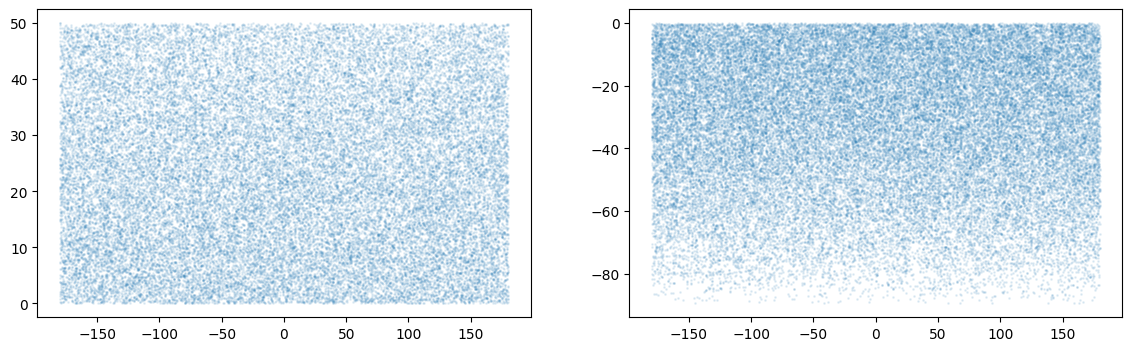

In [2]:




fig, ax=plt.subplots(ncols=2, figsize=(14, 4))
ax[0].scatter(ra.to(u.degree)[mask_ukidss_sdss].value, dec.to(u.degree)[mask_ukidss_sdss], s=1, alpha=0.1)

ax[1].scatter(ra.to(u.degree)[mask_vhs_sdss].value, dec.to(u.degree)[mask_vhs_sdss], s=1, alpha=0.1)


In [3]:
t=pd.DataFrame()
t['RA']=ra.to(u.degree)[mask_vhs_sdss].value+180
t['Dec']=dec.to(u.degree)[mask_vhs_sdss].value
t.to_csv('/users/caganze/vhs_sdss_points.csv')

t=pd.DataFrame()
t['RA']=ra.to(u.degree)[mask_ukidss_sdss].value+180
t['Dec']=dec.to(u.degree)[mask_ukidss_sdss].value
t.to_csv('/users/caganze/ukidss_sdss_points.csv')

In [4]:
#look at crossmatches 
from astropy.io import ascii
t1=ascii.read('/users/caganze/ukidss_sdss_crossmatch.csv').to_pandas()
t2=ascii.read('/users/caganze/vhs_sdss_crossmatch.csv').to_pandas()
t3=ascii.read('/users/caganze/vhs_ps1_crossmatch.csv').to_pandas()

In [5]:
t1.columns

Index(['col1', 'RA', 'Dec', 'JName', 'ra_x', 'dec_x', 'yAperMag3',
       'j_1AperMag3', 'hAperMag3', 'kAperMag3', 'yAperMag3Err',
       'j_1AperMag3Err', 'hAperMag3Err', 'kAperMag3Err', 'sourceID', 'mode',
       'epoch', 'mergedClass', 'angDist', 'RAdeg', 'DEdeg', 'errHalfMaj',
       'errHalfMin', 'errPosAng', 'objID', 'mode_x', 'q_mode', 'class',
       'SDSS12', 'm_SDSS12', 'flags', 'ObsDate', 'Q', 'umag', 'e_umag', 'gmag',
       'e_gmag', 'rmag', 'e_rmag', 'imag', 'e_imag', 'zmag', 'e_zmag', 'zsp',
       'e_zsp', 'f_zsp', 'zph', 'e_zph', 'avg_zph', 'pmRA', 'e_pmRA', 'pmDE',
       'e_pmDE', 'SpObjID', 'spType', 'spCl', 'subClass', 'angDist_x'],
      dtype='object')

[Text(0.5, 1.0, 'PS1-VHS')]

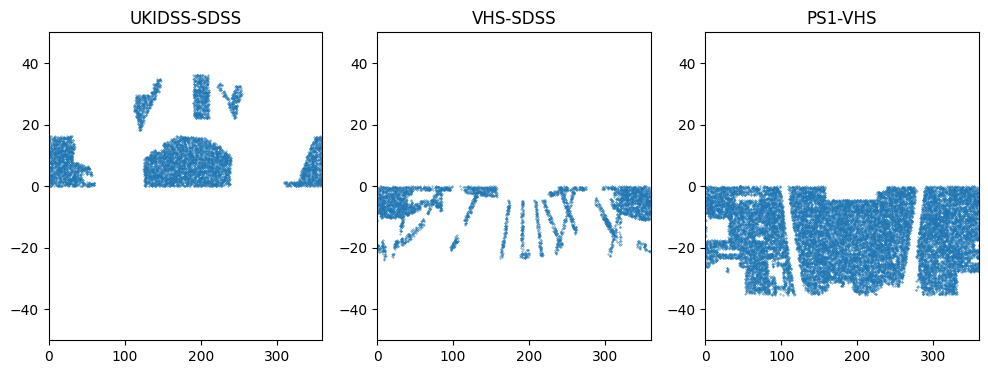

area UKIDSS-SDSS 494.82122028051816
area VHS-SDSS 756.1773957416674
area PS1-SDSS 3675.1279023808315
